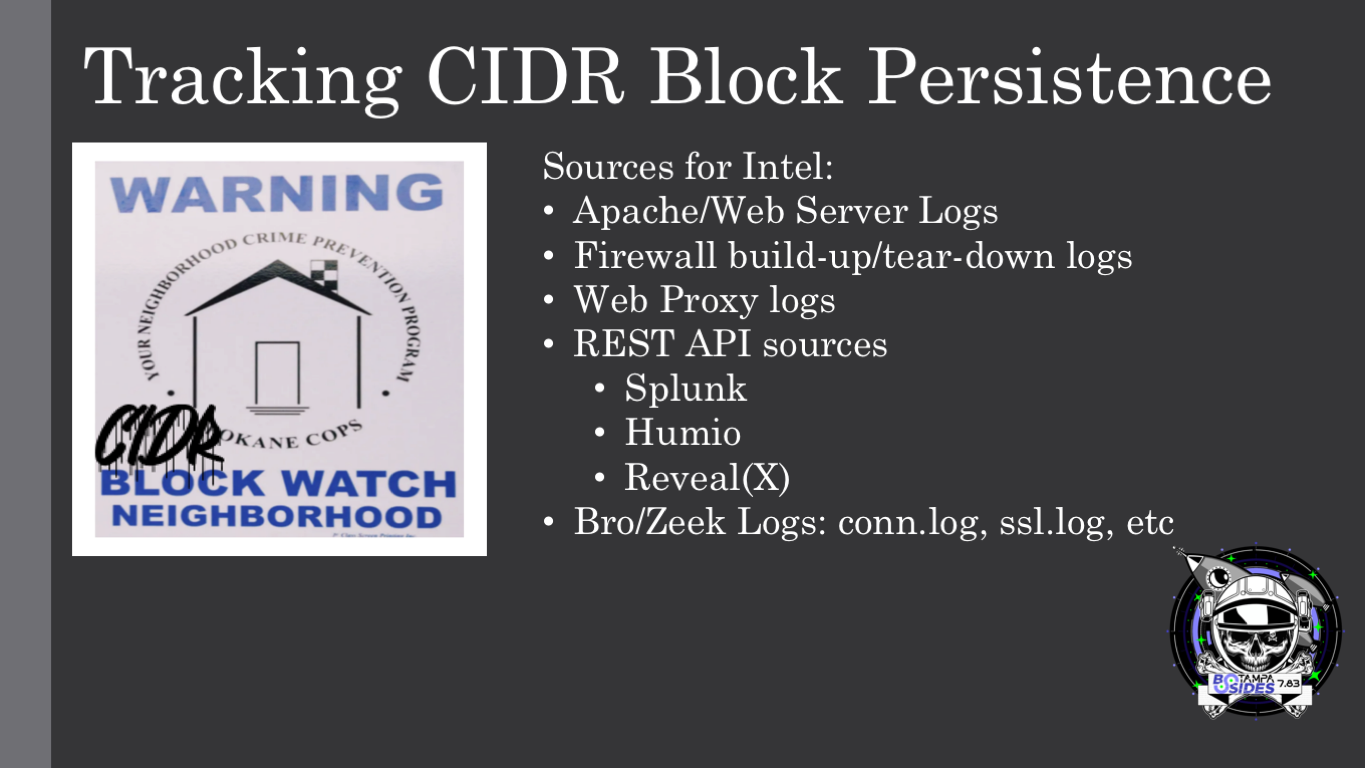

In [198]:
from IPython.display import Image
Image("slide5.png",width=1000)

In [1]:
import requests
import pandas as pd
import json

In [2]:
# Suppress SSL warning
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

In [212]:
###Digital Ocean#####
import io
from netaddr import IPAddress 
from netaddr import IPNetwork
endpoint = 'https://digitalocean.com/geo/google.csv'
r = requests.get(endpoint,  verify=False).content
#for line in r.iter_lines():
#    if line: print line
data = pd.read_csv(io.StringIO(r.decode('utf-8')),names=["CIDR","CountryCode","CountryCity","CountryName","ZIP"])
cidr = data["CIDR"]
#for ips in cidr:
#    ip = IPAddress('104.236.128.62')
#    if ip in IPNetwork(ips):
#        print ips, ip

In [213]:
import csv
for networks in cidr:
    ip = IPNetwork(networks)
    subnets = list(ip.subnet(24))
    #print subnets
    count = 0
    
    while count < len(subnets):
        #print(subnets[count])
        #count +=1
        with open(r'/Users/johnsmith/notebooks/docidrs.csv', "ab") as f:
            writer = csv.writer(f)
            #writer = csv.writer(open("docidrs.csv", "wb"),delimiter='\n')
            writer.writerow([subnets[count]])
            #print subnets[count]
            count +=1

In [218]:
doData = pd.read_csv(r'/Users/johnsmith/notebooks/docidrs.csv',names="A")
doCidr = doData.loc[:,'A'].str.rsplit(pat='.',n=1,expand=True)[0] # < -- Count by /24 CIDR block
#doCidr


In [219]:
from parsebrologs import ParseBroLogs
data = ParseBroLogs('conn.log')
df = pd.DataFrame(json.loads(data.to_json()))
#df
#server = df[~df['id.resp_h'].str.contains(':')]
#addr = server['id.resp_h']
cidr = df.loc[:,'id.resp_h'].str.rsplit(pat='.',n=1,expand=True)[0] # < -- Count by /24 CIDR block
#cidr

0       104.236.128
1       104.236.128
2       104.236.128
3       104.236.128
4       104.236.128
5         192.168.1
6         192.168.1
7         64.252.81
8       104.236.128
9         192.168.1
10      104.236.128
11      104.236.128
12      104.236.128
13      104.236.128
14      104.236.128
15      104.236.128
16      104.236.128
17        192.168.1
18      104.236.128
19      104.236.128
20      104.236.128
21      104.236.128
22      104.236.128
23      104.236.128
24        192.168.1
25      104.236.128
26      104.236.128
27      104.236.128
28      104.236.128
29      104.236.128
30      104.236.128
31      104.236.128
32        192.168.1
33      104.236.128
34        192.168.1
35        64.252.81
36      104.236.128
37        192.168.1
38      104.236.128
39      104.236.128
40      104.236.128
41       212.227.96
42         87.106.1
43         87.106.1
44        192.168.1
45        87.106.12
46        87.106.12
47        87.106.13
48        87.106.66
49        192.168.1


In [220]:
#Compare the two dataframes to find sessions/transactions with known bad hosts
#joined_ips=pd.merge(df,doData, right_on=data.loc[:,'A'].str.rsplit(pat='.',n=1,expand=True)[0], left_on=df.loc[:,'id.resp_h'].str.rsplit(pat='.',n=1,expand=True)[0])
joined_ips=pd.merge(df,doData, right_on=doCidr, left_on=cidr)
joined_df = joined_ips
#joined_df
joined_df.groupby(['id.orig_h','key_0']).size()

id.orig_h      key_0      
192.168.1.103  104.236.128    4147
192.168.1.104  104.236.128    4186
192.168.1.105  104.236.128    1599
192.168.1.106  104.236.128    4160
dtype: int64